# Analysis of Uniswap V2 vs. V3 volume over time

In [43]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]
import requests
import json

### Data issues
To analyse the data we must first make an attempt to clean it. As seen here Flipside's dex_swaps table contains many incredibly large V2 swaps. These must be first removed. Due to SQL limitations I have decided to restrict all swaps to those < 5M in USD value. Considering the price impact a swap like this would have, it is unlikely many, if any swaps actually exceed this value. 

Below is a chart of the largest swap on any given day, ordering these values from smallest to largest shows a large ramp of values up to $8B. 

Removing trades larger than 5M excludes ~1700 on V2 and ~300 on V3 or 0.008 percent for both platforms.

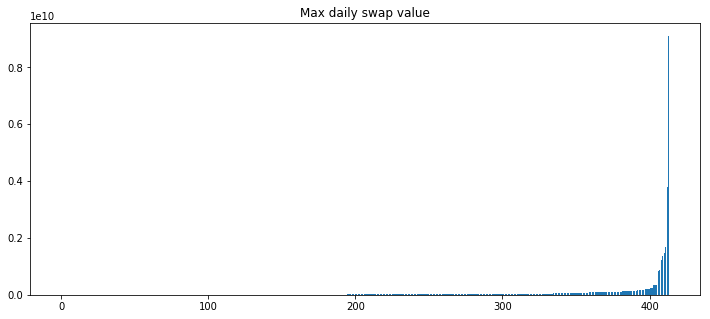

In [44]:
url = 'https://api.flipsidecrypto.com/api/v2/queries/b7bbc636-aa47-47e1-8b0d-a17d89e78c91/data/latest'
x = requests.get(url)
df = pd.DataFrame(x.json())

fig, ax = plt.subplots()
ax.bar(df.index, df['MAX_SWAP'].sort_values())
plt.title('Max daily swap value')
plt.show()

### Now with clean data we can analyse the volume difference
The dataset below contains daily volume for both V2 and V3, the percentage of total volume belonging to V3 and the difference between V2 and V3.

In [46]:
url = 'https://api.flipsidecrypto.com/api/v2/queries/f2e9fe8e-3e3d-4575-a728-a380a8ffc7db/data/latest'
x = requests.get(url)
df = pd.DataFrame(x.json())
df.sort_values(by = 'DATE', inplace = True)
df.reset_index(inplace = True)
df.head()


,index,DATE,V2_VOL,V3_VOL,V3_VOL_PCT,VOLUME_DELTA
0,184,2021-03-14T00:00:00Z,9.282907e+08,NaN,NaN,9.282907e+08
1,183,2021-03-15T00:00:00Z,9.833252e+08,NaN,NaN,9.833252e+08
2,182,2021-03-16T00:00:00Z,9.030868e+08,NaN,NaN,9.030868e+08
3,181,2021-03-17T00:00:00Z,8.837319e+08,NaN,NaN,8.837319e+08
4,180,2021-03-18T00:00:00Z,7.868273e+08,NaN,NaN,7.868273e+08


### Plotting the difference in volume over time
The red line indicates the release of V3. 

As we can see below, V3 very quickly overtakes V2 in terms of daily volume and has remained ahead ever since. The difference also appears to be increasing. Is this a sign of more volume being shifted from V2 to V3 or is DeX volume increasing as a whole? Let's dig depper.

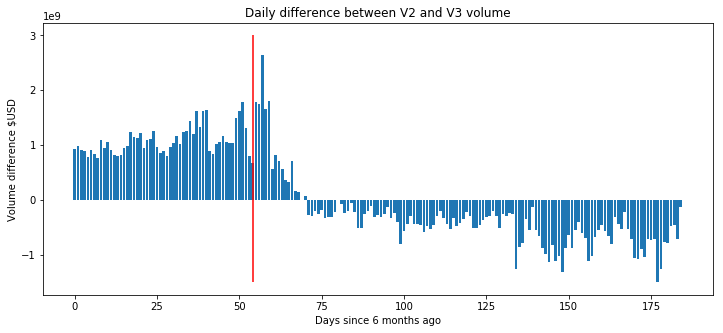

In [59]:
v3_release = df[df['DATE'] == '2021-05-07T00:00:00Z'].index
#plt.figure(figsize=(2, 12))
plt.bar(df.index, df['VOLUME_DELTA'])
plt.vlines(v3_release, ymin = -1.5*10**9, ymax = 3*10**9, color = 'r')
plt.title('Daily difference between V2 and V3 volume')
plt.xlabel('Days since 6 months ago')
plt.ylabel('Volume difference $USD')
plt.show()

### Percentage of volume consumed by V3
We have seen on an absolute level, volume on V3 is greater than V2. Now let's see overall Uniswap volume.

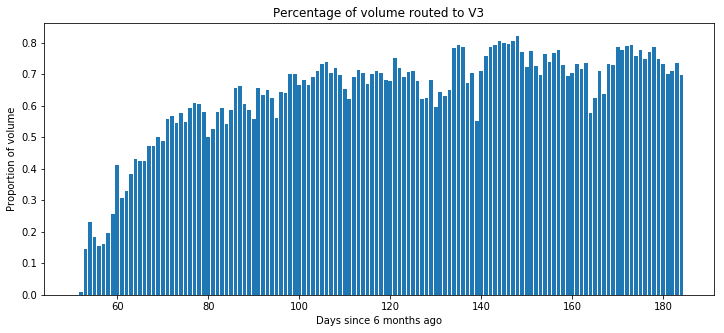

In [61]:
plt.bar(df.index, df['V3_VOL_PCT'])
plt.title('Percentage of volume routed to V3')
plt.xlabel('Days since 6 months ago')
plt.ylabel('Proportion of volume')
plt.show()

The proportion of volume sent to V3 very quickly rises to ~60% and has been increasing steadily overtime. Let's smooth this out with a rolling average.

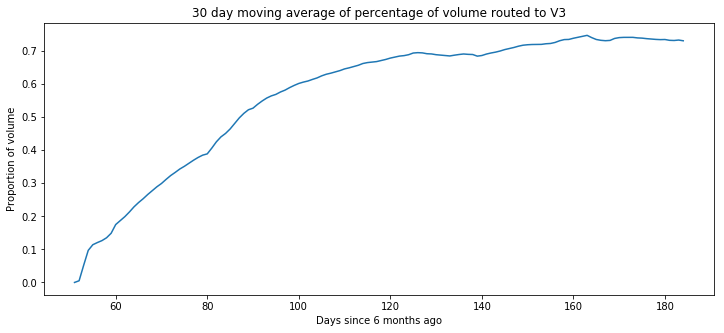

In [71]:
df_2 = df.rolling(30, min_periods = 1).mean()

plt.plot(df_2.index, df_2['V3_VOL_PCT'])

plt.title('30 day moving average of percentage of volume routed to V3')
plt.xlabel('Days since 6 months ago')
plt.ylabel('Proportion of volume')
plt.show()

## Conclusion
V3 quickly surpassed V2 volume after release and has since been steadily gaining share. This has somewhat plateaued around mid-August, centering itself at 75% of all swap-volume. 
Given the effective routing of Uniswap, as long as there is still liquidity in V2 it will get some share of the volume. A deeper analysis could be used to understand the relationship between TVL/virtual liquidity and volume share.